In [35]:
import sounddevice as sd
import soundfile as sf
from scipy.io.wavfile import write, read
from scipy.signal import csd, chirp
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import correlate
from IPython.display import Audio
%matplotlib inline

264600 132300


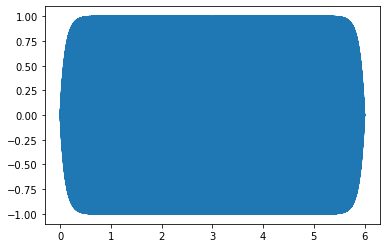

In [32]:
fs = 44100
sec = 3

k = 10
fl = 60
fu = 22000

t = np.linspace(0, sec, fs*sec)
chirp_signal = chirp(t, f0=fl, f1=fu, t1=sec, method='linear') # can be linear, quadratic or logarithmic

inverse = np.flip(chirp_signal) # time reversed signal

combined = np.concatenate((inverse, chirp_signal), axis=None) # combine inverse chirp + chirp
t2 = np.linspace(0, 2*sec, fs*2*sec)
combined *= (1-np.exp(-k*t2))*(1-np.exp(-k*(2*sec-t2))) # apply exponential smoothing at ends
chirp_signal *= (1-np.exp(-k*t))*(1-np.exp(-k*(sec-t))) # same, but for single chirp


print(len(combined), len(chirp_signal))
# plt.plot(t, chirp_signal)
plt.plot(t2, combined) # check profile

In [38]:
sf.write('chirp_lin_combined.wav', combined, fs) # chirp_signal or combined
sd.play(combined, fs) # play signal
status = sd.wait()

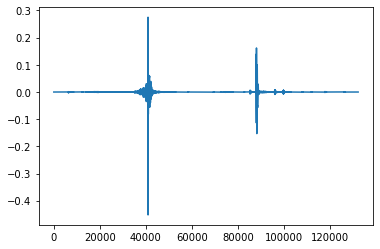

In [37]:
recording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished

sf.write('chirp_rec.wav', recording, fs)  # Save as WAV file 
plt.plot(recording)

In [ ]:
seconds = 8
recording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()
write('chirp_rec.wav', fs, recording)
plt.plot(recording)

Done


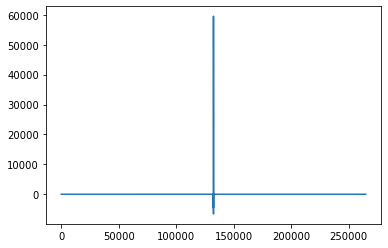

In [33]:
inverse_comb = np.flip(combined)
#conv = np.convolve(combined, inverse_comb) # real: recording[:, 0], ideal use: combined
conv = np.convolve(chirp_signal, inverse)
print("Done") # can take a while if long periods of time
plt.plot(conv)

In [34]:
max_index = np.argmax(conv) # find peak of signal for synchronisation, should be out by 1 sample
print("Index of peak: ", max_index)
trimmed = conv[max_index-1000:max_index+3000] # trim around the peak
trimmed /= np.linalg.norm(trimmed) # normalise

Index of peak:  132299


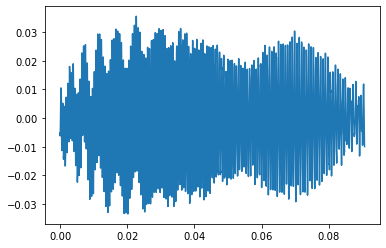

In [25]:
plt.plot(np.linspace(0, len(trimmed)/fs, len(trimmed)), trimmed)

1024


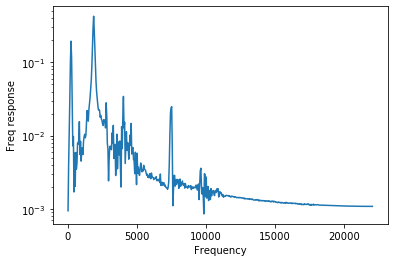

In [26]:
N = 1024
conv_fft = np.fft.fft(trimmed, N) # freq response is ft of impulse response
normalised = conv_fft / np.linalg.norm(conv_fft) # normalise
print(len(normalised))
plt.semilogy(np.linspace(0,fs/2,int(N/2)),np.abs(normalised)[0:int(N/2)]) # only care up to 22kHz
plt.ylabel("Freq response")
plt.xlabel("Frequency")
plt.show()